# Therapeutic Data Commons EDA

In [3]:
import pandas as pd
import networkx as nx 
from rdkit import Chem
from tdc.single_pred import ADME

C:\Users\ninja\AppData\Local\Temp\ipykernel_20920\3717162208.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#load ADME dataset into dataframe
data = ADME(name='Caco2_Wang')
df = data.get_data()
df.head()

Downloading...
100%|██████████| 82.5k/82.5k [00:00<00:00, 2.08MiB/s]
Loading...
Done!


,Drug_ID,Drug,Y
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000
3,creatinine,CN1CC(=O)NC1=N,-5.935409
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000


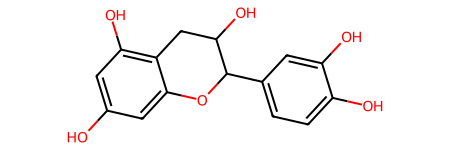

In [5]:
sample_smiles = df["Drug"][0]
sample_mol = Chem.MolFromSmiles(sample_smiles)
sample_mol

From PubChem:

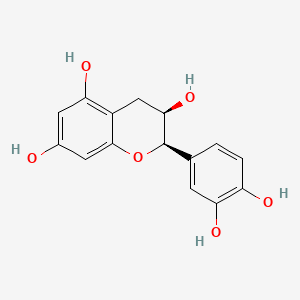

In [6]:
for atom in sample_mol.GetAtoms():
    print(atom.GetAtomicNum())

8
6
6
6
8
6
6
6
8
6
6
6
6
6
8
6
8
6
6
8
6


In [7]:
sample_mol.GetAtomWithIdx(1).IsInRing()

True

In [8]:
# embedding (default ETKDG)
from rdkit.Chem import AllChem
embedded_mol = Chem.AddHs(sample_mol) #hydrogens not in graphs by default
AllChem.EmbedMolecule(embedded_mol)

0

In [9]:
#checking alignment
m = Chem.MolFromSmiles('C1CCC1OC')
m2=Chem.AddHs(m)
# run ETKDG 10 times
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10)
print(len(cids))
rmslist = []
AllChem.AlignMolConformers(m2, RMSlist=rmslist)
print(len(rmslist))

10
9


In [10]:
rms = AllChem.GetConformerRMS(m2, 1, 9, prealigned=True)

### Morgan Fingerprints for Learned Embeddings via AutoEncoder?

In [13]:
# https://greglandrum.github.io/rdkit-blog/posts/2023-01-18-fingerprint-generator-tutorial.html
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
import rdkit
print(rdkit.__version__)
import matplotlib_inline

2023.09.4


In [14]:
#get drug structures from smiles
ms = [Chem.MolFromSmiles(x) for x in df["Drug"]]
len(ms)

910

In [15]:
# instantiate generator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)
# different morgan fps
# bit vectors:
fp = mfpgen.GetFingerprint(ms[0])
sfp = mfpgen.GetSparseFingerprint(ms[0])

# count vectors:
cfp = mfpgen.GetCountFingerprint(ms[0])
scfp = mfpgen.GetSparseCountFingerprint(ms[0])

# take a look
print(f'fp: {type(fp)} {len(fp)}')
print(f'sfp: {type(sfp)} {len(sfp)}')
print(f'cfp: {type(cfp)} {cfp.GetLength()}')
print(f'scfp: {type(scfp)} {scfp.GetLength()}')

fp: <class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'> 2048
sfp: <class 'rdkit.DataStructs.cDataStructs.SparseBitVect'> 4294967295
cfp: <class 'rdkit.DataStructs.cDataStructs.UIntSparseIntVect'> 2048
scfp: <class 'rdkit.DataStructs.cDataStructs.ULongSparseIntVect'> 18446744073709551615


In [17]:
import numpy as np

np_bits = mfpgen.GetFingerprintAsNumPy(sample_mol)
np_bits

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)